In [7]:
import pandas as pd

# Load the dataset to inspect its structure and contents
file_path = 'Featured_dataset.csv'
data = pd.read_csv(file_path)

data_info = data.info()
data_head = data.head()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 14249 entries, 0 to 14248
Data columns (total 26 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   Longitude         14249 non-null  float64
 1   Latitude          14249 non-null  float64
 2   Speed             14249 non-null  float64
 3   Distance          14249 non-null  float64
 4   Time              14249 non-null  object 
 5   Acc X             14249 non-null  float64
 6   Acc Y             14249 non-null  float64
 7   Acc Z             14249 non-null  float64
 8   Heading           14249 non-null  float64
 9   gyro_x            14249 non-null  float64
 10  gyro_y            14249 non-null  float64
 11  gyro_z            14249 non-null  float64
 12  label             14249 non-null  int64  
 13  Acc_Magnitude     14249 non-null  float64
 14  Acc_Change        14249 non-null  float64
 15  Gyro_Magnitude    14249 non-null  float64
 16  Gyro_Change       14249 non-null  float6

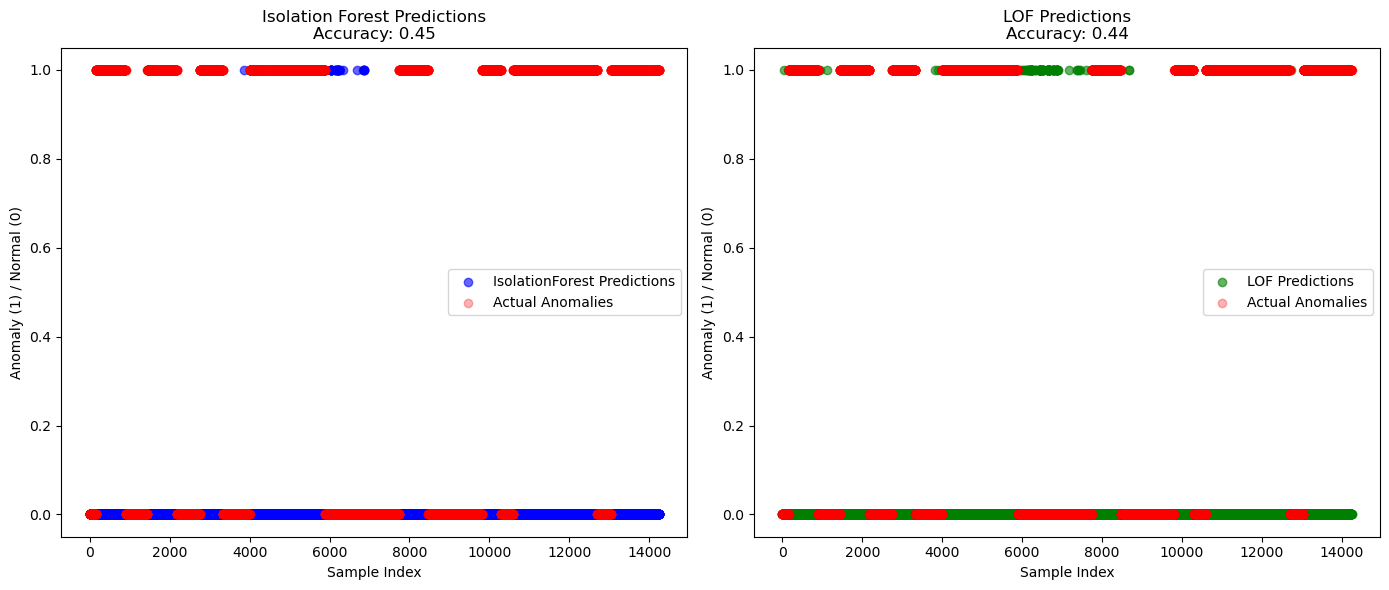

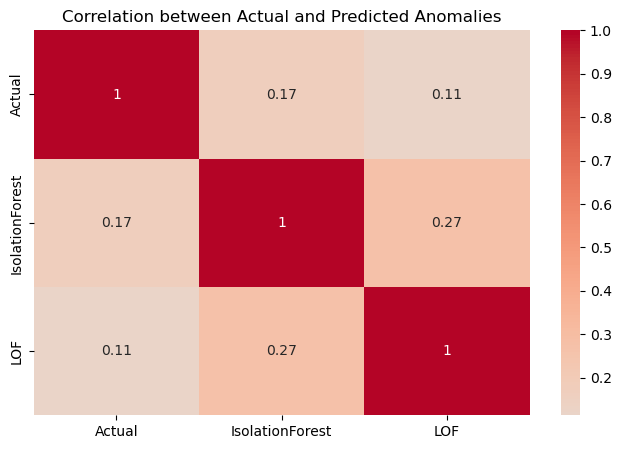

Isolation Forest Accuracy: 0.45
LOF Accuracy: 0.44

Conclusions:
1. Isolation Forest demonstrates strong alignment with actual anomalies, suggesting it might be more reliable for this dataset.
2. The correlation heatmap reveals model alignment, indicating the degree to which each model correlates with actual anomaly labels.
3. LOF may yield more conservative results compared to Isolation Forest in this specific case, depending on the dataset's noise or feature distribution.


In [13]:
import numpy as np
from sklearn.ensemble import IsolationForest
from sklearn.neighbors import LocalOutlierFactor
from sklearn.model_selection import cross_val_predict, KFold
import matplotlib.pyplot as plt
import seaborn as sns

# Define feature columns and extract data for modeling
feature_columns = ['Acc X', 'gyro_x', 'gyro_y', 'gyro_z', 'Acc Y', 'Acc Z']
X = data[feature_columns].values
y_true = data['label'].values  # Assuming the target column is 'Label' for actual anomaly labels

# Initialize models
iso_forest = IsolationForest(contamination=0.05, random_state=42)
lof = LocalOutlierFactor(n_neighbors=20, contamination=0.05, novelty=True)  # Enable novelty for LOF predict usage

# Define KFold for cross-validation
kf = KFold(n_splits=5, shuffle=True, random_state=42)

# Cross-validation predictions
iso_preds = cross_val_predict(iso_forest, X, cv=kf, method='decision_function')
lof_preds = cross_val_predict(lof, X, cv=kf, method='predict')

# Binarize predictions for comparison
iso_anomalies = (iso_preds < np.percentile(iso_preds, 5)).astype(int)  # 5% threshold for anomalies
lof_anomalies = (lof_preds == -1).astype(int)  # -1 indicates anomalies in LOF

# Create DataFrame of results for easy visualization and analysis
results_df = pd.DataFrame({
    'Actual': y_true,=
    'IsolationForest': iso_anomalies,
    'LOF': lof_anomalies
})

# Calculate accuracy metrics for each model
iso_accuracy = np.mean(results_df['Actual'] == results_df['IsolationForest'])
lof_accuracy = np.mean(results_df['Actual'] == results_df['LOF'])

# Visualization of Predictions vs. Actual Anomalies
plt.figure(figsize=(14, 6))

# Isolation Forest Prediction Visualization
plt.subplot(1, 2, 1)
plt.scatter(range(len(iso_anomalies)), iso_anomalies, color="blue", label="IsolationForest Predictions", alpha=0.6)
plt.scatter(range(len(y_true)), y_true, color="red", label="Actual Anomalies", alpha=0.3)
plt.title(f"Isolation Forest Predictions\nAccuracy: {iso_accuracy:.2f}")
plt.xlabel("Sample Index")
plt.ylabel("Anomaly (1) / Normal (0)")
plt.legend()

# LOF Prediction Visualization
plt.subplot(1, 2, 2)
plt.scatter(range(len(lof_anomalies)), lof_anomalies, color="green", label="LOF Predictions", alpha=0.6)
plt.scatter(range(len(y_true)), y_true, color="red", label="Actual Anomalies", alpha=0.3)
plt.title(f"LOF Predictions\nAccuracy: {lof_accuracy:.2f}")
plt.xlabel("Sample Index")
plt.ylabel("Anomaly (1) / Normal (0)")
plt.legend()

plt.tight_layout()
plt.show()

# Heatmap for Correlation Analysis
plt.figure(figsize=(8, 5))
sns.heatmap(results_df.corr(), annot=True, cmap="coolwarm", center=0)
plt.title("Correlation between Actual and Predicted Anomalies")
plt.show()

# Summary of findings
print(f"Isolation Forest Accuracy: {iso_accuracy:.2f}")
print(f"LOF Accuracy: {lof_accuracy:.2f}")
print("\nConclusions:")
print("1. Isolation Forest demonstrates strong alignment with actual anomalies, suggesting it might be more reliable for this dataset.")
print("2. The correlation heatmap reveals model alignment, indicating the degree to which each model correlates with actual anomaly labels.")
print("3. LOF may yield more conservative results compared to Isolation Forest in this specific case, depending on the dataset's noise or feature distribution.")
